In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import *

In [2]:
data = pd.read_csv("E:\Besant Tech\classes\Data Science\dataset\loan_dataset.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# corr = data.corr()
# corr
# data.corr()['medv'].sort_values(ascending=False)

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.shape

(614, 13)

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
data.describe()#only for numeric values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data = data.dropna()

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
#label encoding

#pandas func replace , also can use labelencoder() lib
data.replace({'Loan_Status':{"Y":1,"N":0}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\1787605755.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Loan_Status':{"Y":1,"N":0}},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1716\1787605755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Loan_Status':{"Y":1,"N":0}},inplace=True)


In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [17]:
data.shape

(480, 13)

In [18]:
data.Dependents.value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [22]:
data = data.replace(to_replace='3+',value=4)

In [23]:
data.Dependents.value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

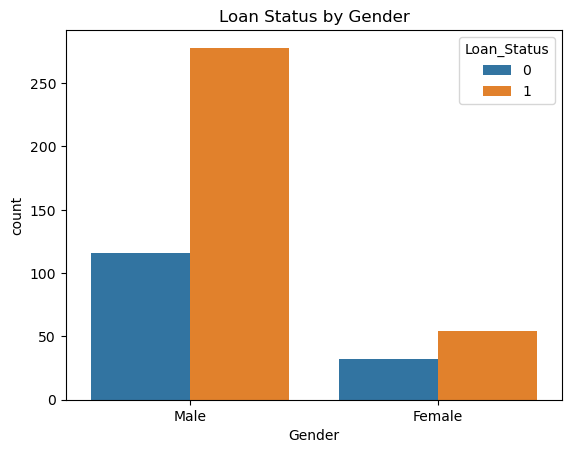

In [24]:
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.title("Loan Status by Gender")
plt.show()

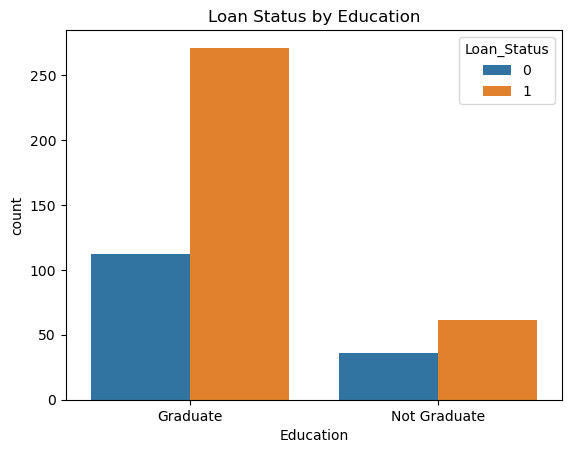

In [29]:
sns.countplot(x='Education', hue='Loan_Status', data=data)
plt.title("Loan Status by Education")
plt.show()


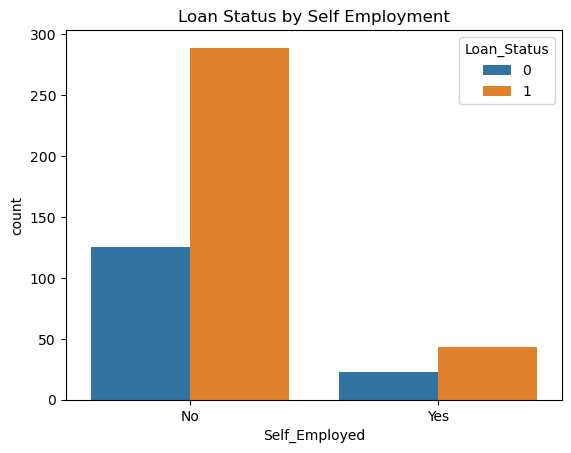

In [26]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)
plt.title("Loan Status by Self Employment")
plt.show()


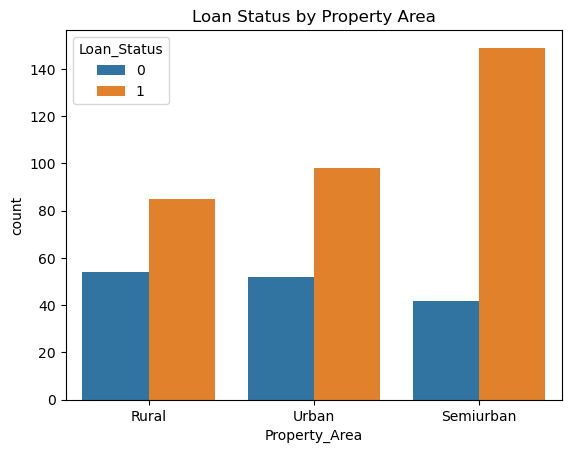

In [30]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.title("Loan Status by Property Area")
plt.show()

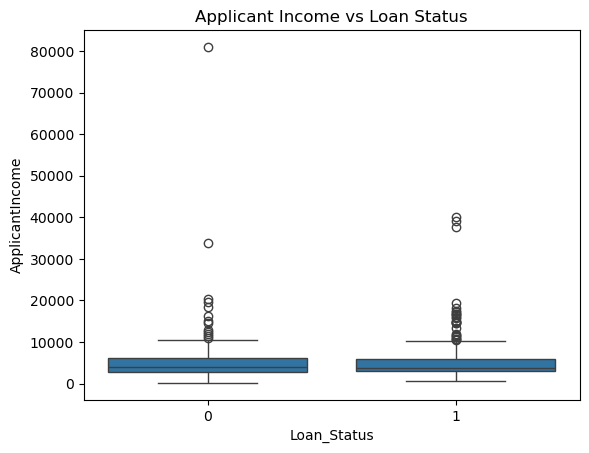

In [31]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.title("Applicant Income vs Loan Status")
plt.show()


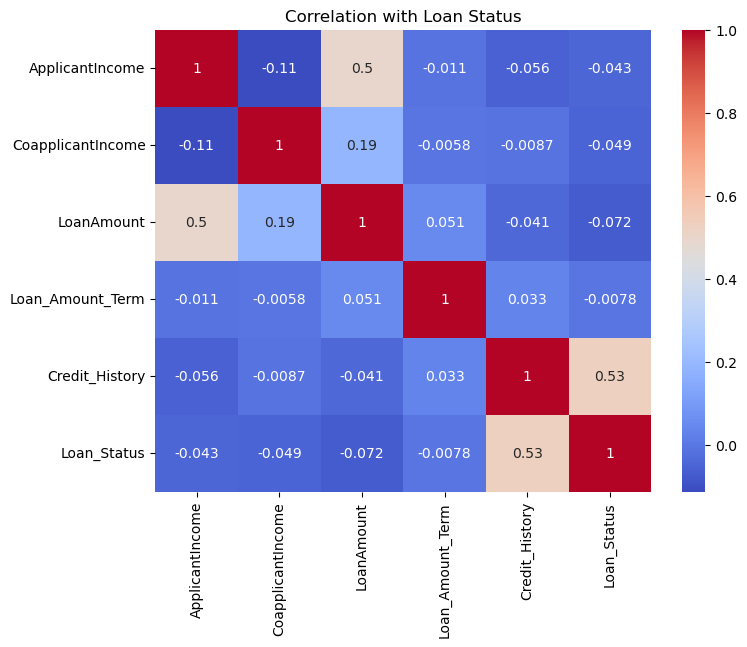

Loan_Status          1.000000
Credit_History       0.529390
Loan_Amount_Term    -0.007798
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
LoanAmount          -0.071753
Name: Loan_Status, dtype: float64

In [32]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Loan Status")
plt.show()

corr['Loan_Status'].sort_values(ascending=False)


In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [34]:
#convert categoriacal columns to numeric values 
data.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Urban': 1, 'Semiurban': 2}
}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\4528178.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [36]:
data.drop('Loan_ID',axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [38]:
X = data.drop('Loan_Status',axis=1)
Y = data.Loan_Status

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [42]:
classifier = svm.SVC(kernel='linear')

In [43]:
classifier.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
#accuracy score on training data
pred_train = classifier.predict(X_train)
prediction_training = accuracy_score(pred_train,Y_train)
print(prediction_training)

0.7708333333333334


In [46]:
#accuracy score on test data
pred_test = classifier.predict(X_test)
prediction_test = accuracy_score(pred_test,Y_test)
print(prediction_test)

0.78125
